# Descrição

Nessa tarefa você vai programar regressão linear simples do zero em python. Para isso, você vai assistir o seguinte vídeo no [youtube](https://www.youtube.com/watch?v=XdM6ER7zTLk) e seguir o passo a passo da implementação. Embora o código esteja disponível no [github](https://github.com/llSourcell/linear_regression_live) do autor. 

É importante que você digite o código enquanto assiste. Vários estudos já mostraram que aprendemos melhor dessa forma do que somente assistindo. Teste o programa nos dados também fornecidos no github do autor.

Feito isso,  a sua tarefa agora é a seguinte:

1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados no link: [income.csv](https://canvas.instructure.com/courses/1389733/files/68104717/download?verifier=u1l8XB5LcZ51C1MtFrBKJJ9sSPz3f3AOo56Nfk2J&wrap=1). Esse exemplo foi trabalhado em sala de aula. 
2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.
3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.
4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.
5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.
6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?
7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Check Data

In [2]:
df = pd.read_csv('../data/income.csv', header=None)
df.head()


,0,1
0,10.000000,26.658839
1,10.401338,27.306435
2,10.842809,22.132410
3,11.244147,21.169841
4,11.645485,15.192634


In [3]:
df.shape

(30, 2)

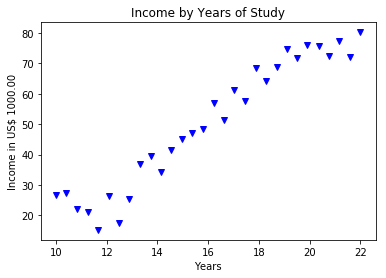

<Figure size 432x288 with 0 Axes>

In [4]:
plt.plot(df.iloc[:,0], df.iloc[:,1] , 'bv') 
plt.title('Income by Years of Study') 
plt.xlabel('Years')
plt.ylabel('Income in US$ 1000.00')

plt.figure()

plt.show()

## Item 1
Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna)

In [5]:

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

def run():
    points = np.genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


## Item 2
Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

In [35]:

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate, itera, verbose=False, period=50):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    
    new_error = compute_error_for_line_given_points(new_b, new_m, points)
    
    if verbose:
        if itera % period == 0:
            print("Step gradient at b = {0}, m = {1}, error = {2}".format(new_b, new_m, new_error))
       
    return [new_b, new_m, b_gradient, m_gradient, new_error]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    history = pd.DataFrame(columns=['bias','slope','bias_grad', 'slope_grad','error','iter'])
    for i in range(num_iterations):
        step_grad = step_gradient(b, m, np.array(points), learning_rate, i, True)
        b, m = step_grad[0], step_grad[1]
        history = history.append({'bias': step_grad[0], 'slope': step_grad[1], 'bias_grad': step_grad[2],
                        'slope_grad': step_grad[3], 'error': step_grad[4], 'iter': i}, ignore_index=True)
    return history

def run():
    points = np.genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    
    initial_error = compute_error_for_line_given_points(initial_b, initial_m, points)
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, initial_error))
    print("Running...")
    
    history = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    final_bias = history['bias'][history.shape[0]-1]
    final_slope = history['slope'][history.shape[0]-1]
    final_error = compute_error_for_line_given_points(final_bias, final_slope, points)
    
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, final_bias, final_slope, final_error))
    
    return history


hist_item_2_3 = run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Step gradient at b = 0.010029093861364507, m = 0.17483245665563385, error = 2648.2381266261386
Step gradient at b = 0.16224451219582517, m = 3.0495672429883767, error = 114.65917190116292
Step gradient at b = 0.1540919959601231, m = 3.230157419836556, error = 104.70597869157886
Step gradient at b = 0.13593224011303429, m = 3.2424867207851698, error = 104.59629197125872
Step gradient at b = 0.11715588250239854, m = 3.244306940687362, error = 104.52506735534097
Step gradient at b = 0.0983494029715421, m = 3.245470326109695, error = 104.45406006127061
Step gradient at b = 0.0795494256035937, m = 3.246592190479218, error = 104.38312085074011
Step gradient at b = 0.06075823373709083, m = 3.2477109628793253, error = 104.31224907772851
Step gradient at b = 0.041975965992178225, m = 3.248829043600966, error = 104.24144467586197
Step gradient at b = 0.023202627044437908, m = 3.249946582789181, error = 104.170707581

## Item 3
O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.

In [36]:
def plot_model_error(hist):
    plt.plot(hist['iter'], hist['error'] , 'r', label='Model Error') 
    plt.title('Model Error (RSS) By Iteration') 
    plt.legend()

    plt.figure()

    plt.show()

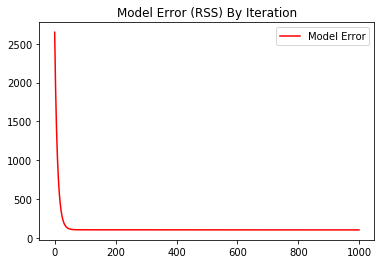

<Figure size 432x288 with 0 Axes>

In [37]:
plot_model_error(hist_item_2_3)

#### Plot Linear Regression Model Predictions

In [31]:
def plot_predicted_model(hist):
    predictions_df = pd.DataFrame(df)
    predictions_df = predictions_df.rename(index=str, columns={0 : 'Year', 1: 'Income'})
    predictions_df.insert(loc=2, column='Predicted_Income', value=0.0)
    
    final_model = [hist['bias'][hist.shape[0]-1], hist['slope'][hist.shape[0]-1]]
    model_slope = final_model[1]
    model_bias = final_model[0]

    for i in range(0, predictions_df.shape[0]):
        year = predictions_df['Year'][i]
        predictions_df['Predicted_Income'][i] = '{:2.6f}'.format(year * model_slope + model_bias)

    plt.plot(predictions_df['Year'], predictions_df['Income'], 'bo', label='Original Data') 
    plt.plot(predictions_df['Year'], predictions_df['Predicted_Income'], 'r', label='Predicted Data') 
    plt.title('Comparison of Original Income and Predicted Income') 
    plt.legend()

    plt.figure()
    plt.show()

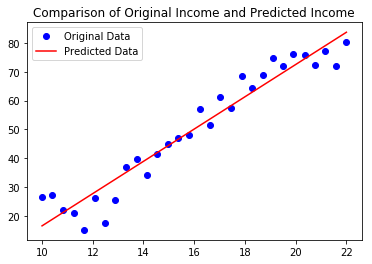

<Figure size 432x288 with 0 Axes>

In [32]:
plot_predicted_model(history)

## Item 4
Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Step gradient at b = 0.3008728158409352, m = 5.244973699669015, error = 1192.5455472930987
Step gradient at b = -9.656210881087837, m = 3.826142297584296, error = 72.17883366795652
Step gradient at b = -17.051709450351808, m = 4.26638122120031, error = 53.761743672145165
Step gradient at b = -22.61124578381276, m = 4.597329063096865, error = 43.3538405476851
Step gradient at b = -26.790604883621064, m = 4.846117773455241, error = 37.47210529674251
Step gradient at b = -29.932421293745435, m = 5.033143686804845, error = 34.14820718311791
Step gradient at b = -32.294269155868555, m = 5.173739665673291, error = 32.26979916262993
Step gradient at b = -34.06977879603704, m = 5.279432127856463, error = 31.20826942531019
Step gradient at b = -35.40451103382695, m = 5.358886011617907, error = 30.608375594511262
Step gradient at b = -36.40789063047447, m = 5.418615149480527, error = 30.269362380298936
Step gradient

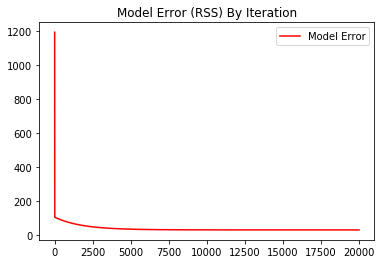

<Figure size 432x288 with 0 Axes>

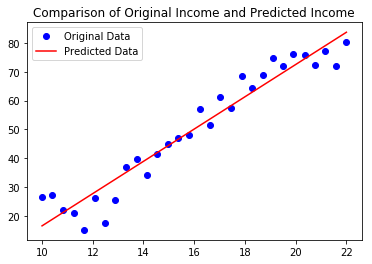

<Figure size 432x288 with 0 Axes>

In [39]:

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate, itera, verbose=False, period=1000):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    
    new_error = compute_error_for_line_given_points(new_b, new_m, points)
    
    if verbose:
        if itera % period == 0:
            print("Step gradient at b = {0}, m = {1}, error = {2}".format(new_b, new_m, new_error))
       
    return [new_b, new_m, b_gradient, m_gradient, new_error]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    history = pd.DataFrame(columns=['bias','slope','bias_grad', 'slope_grad','error','iter'])
    for i in range(num_iterations):
        step_grad = step_gradient(b, m, np.array(points), learning_rate, i, True)
        b, m = step_grad[0], step_grad[1]
        history = history.append({'bias': step_grad[0], 'slope': step_grad[1], 'bias_grad': step_grad[2],
                        'slope_grad': step_grad[3], 'error': step_grad[4], 'iter': i}, ignore_index=True)
    return history

def run():
    points = np.genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 3 * 1e-3
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 20000
    
    initial_error = compute_error_for_line_given_points(initial_b, initial_m, points)
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, initial_error))
    print("Running...")
    
    history = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    final_bias = history['bias'][history.shape[0]-1]
    final_slope = history['slope'][history.shape[0]-1]
    final_error = compute_error_for_line_given_points(final_bias, final_slope, points)
    
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, final_bias, final_slope, final_error))
    print("Learning Rate = {}".format(learning_rate))
    
    return history


hist_item_4 = run()

plot_model_error(hist_item_4)
plot_predicted_model(hist_item_4)

## Item 5
O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

In [ ]:

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate, itera, verbose=False, period=1000):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    
    new_error = compute_error_for_line_given_points(new_b, new_m, points)
    
    if verbose:
        if itera % period == 0:
            print("Step gradient at b = {0}, m = {1}, error = {2}".format(new_b, new_m, new_error))
       
    return [new_b, new_m, b_gradient, m_gradient, new_error]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    history = pd.DataFrame(columns=['bias','slope','bias_grad', 'slope_grad','error','iter'])
    for i in range(num_iterations):
        step_grad = step_gradient(b, m, np.array(points), learning_rate, i, True)
        b, m = step_grad[0], step_grad[1]
        history = history.append({'bias': step_grad[0], 'slope': step_grad[1], 'bias_grad': step_grad[2],
                        'slope_grad': step_grad[3], 'error': step_grad[4], 'iter': i}, ignore_index=True)
    return history

def run():
    points = np.genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 3 * 1e-3
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 20000
    
    initial_error = compute_error_for_line_given_points(initial_b, initial_m, points)
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, initial_error))
    print("Running...")
    
    history = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    final_bias = history['bias'][history.shape[0]-1]
    final_slope = history['slope'][history.shape[0]-1]
    final_error = compute_error_for_line_given_points(final_bias, final_slope, points)
    
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, final_bias, final_slope, final_error))
    print("Learning Rate = {}".format(learning_rate))
    
    return history


hist_item_5 = run()

plot_model_error(hist_item_5)